<a href="https://colab.research.google.com/github/badtripdude/Autoencoder/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install tensorflow==2.10.0
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 1.7 MB 48.5 MB/s 
     |████████████████████████████████| 5.9 MB 49.8 MB/s 
     |████████████████████████████████| 438 kB 48.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
tf.__version__

'2.10.0'

In [ ]:
def plot_digits(samples):
  fig = plt.figure(figsize=(10, 6))
  num = samples.shape[0]
  for j in range(num):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(samples[j, :, :, 0], cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
train_ds, test_ds = tfds.load('mnist', split=['train', 'test'], as_supervised=True,
               batch_size=-1)

<class 'numpy.ndarray'> (60000, 28, 28, 1)
<class 'numpy.ndarray'> (10000, 28, 28, 1)


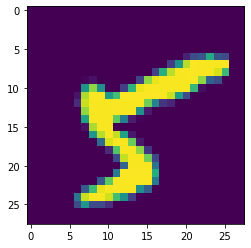

In [ ]:
# train_x = train_x.astype(np.float32) / 255.0
# test_x = test_x.astype(np.float32) / 255.0
train_x = tfds.as_numpy(train_ds[0]).reshape(-1, 28, 28, 1).astype(np.float32) / 255.
test_x = tfds.as_numpy(test_ds[0]).reshape(-1, 28, 28, 1).astype(np.float32) / 255.
print(type(train_x), train_x.shape)
print(type(test_x), test_x.shape)
plt.imshow(train_x[-1].reshape((28, 28)))

# Create Autoencoder model: Encoder and Decoder

In [ ]:
from tensorflow.keras.layers import (ZeroPadding2D, Conv2D, 
                  MaxPool2D, UpSampling2D, Cropping2D)

encoder = tf.keras.Sequential([
    ZeroPadding2D(padding=(2, 2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPool2D((2,2)),

])
decoder = tf.keras.Sequential([
    Conv2D(8, (3,3), padding='same', activation='relu'),
    UpSampling2D((2,2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    UpSampling2D((2,2)),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    UpSampling2D((2,2)),
    Conv2D(1, (3,3), padding='same', activation='sigmoid'),
    Cropping2D((2,2))
])

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
NUM_EPOCHS = 60
BATCH_SIZE = 128
autoencoder.fit(train_x, train_x,
                batch_size=BATCH_SIZE,
                epochs=NUM_EPOCHS,
                shuffle=True,
                validation_data=(test_x, test_x))

Epoch 1/60
469/469 [==============================] - 83s 175ms/step - loss: 0.2316 - val_loss: 0.1566
Epoch 2/60
469/469 [==============================] - 78s 167ms/step - loss: 0.1458 - val_loss: 0.1373
Epoch 3/60
469/469 [==============================] - 77s 164ms/step - loss: 0.1326 - val_loss: 0.1280
Epoch 4/60
469/469 [==============================] - 77s 164ms/step - loss: 0.1255 - val_loss: 0.1216
Epoch 5/60
469/469 [==============================] - 77s 163ms/step - loss: 0.1201 - val_loss: 0.1167
Epoch 6/60
469/469 [==============================] - 76s 163ms/step - loss: 0.1163 - val_loss: 0.1136
Epoch 7/60
469/469 [==============================] - 76s 163ms/step - loss: 0.1133 - val_loss: 0.1120
Epoch 8/60
469/469 [==============================] - 76s 163ms/step - loss: 0.1112 - val_loss: 0.1094
Epoch 9/60
469/469 [==============================] - 78s 167ms/step - loss: 0.1096 - val_loss: 0.1075
Epoch 10/60
469/469 [==============================] - 77s 164ms/step - l

1/1 [==============================] - 0s 58ms/step


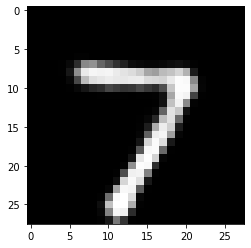

In [ ]:
res = autoencoder.predict(test_x[0:8])
plt.imshow(res[0].reshape((28,28)), cmap='gray')
# plt.imshow(image[0].reshape((28,28)))

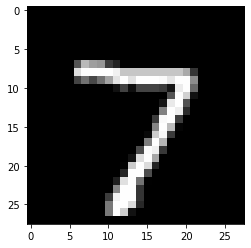

In [ ]:
plt.imshow(test_x[0].reshape((28, 28)), cmap='gray')